In [1]:
"""
Main Execution Script for LPPLS Bubble Detection System
Run this script to perform complete analysis on gold and platinum markets
"""

import os
import sys
import pandas as pd
from datetime import datetime
from lppls_bubble_detector import BubbleDetectionSystem
from lppls_backtesting import run_comprehensive_backtest

LPPLS BUBBLE DETECTION SYSTEM
Gold and Platinum Markets Analysis

Based on Financial Crisis Observatory Methodology
References:
  - Pham Huu (2019): Back-testing FCO Output
  - Mamageishvili (2019): Back-testing FCO Output
  - Sornette et al.: LPPLS Model Development

ANALYSIS PARAMETERS
Window Size: 252 days (~1 year)
Step Size: 21 days (~1 month)
Confidence Threshold: 0.6
Probability Threshold: 0.7

STEP 1: INITIALIZING SYSTEM
Loaded data: 9470 observations
Date range: 1990-01-02 00:00:00 to 2025-10-20 00:00:00

STEP 2: RUNNING LPPLS BUBBLE DETECTION

This may take several minutes depending on data size...
Progress will be shown for each window analyzed.


ANALYZING GOLD
Total windows to analyze: 439
Processing Gold: 1990-12-19 (0/9218)
Processing Gold: 1991-01-17 (21/9218)
Processing Gold: 1991-02-15 (42/9218)
Processing Gold: 1991-03-18 (63/9218)
Processing Gold: 1991-04-16 (84/9218)
Processing Gold: 1991-05-15 (105/9218)
Processing Gold: 1991-06-13 (126/9218)
Processing Gold: 1991

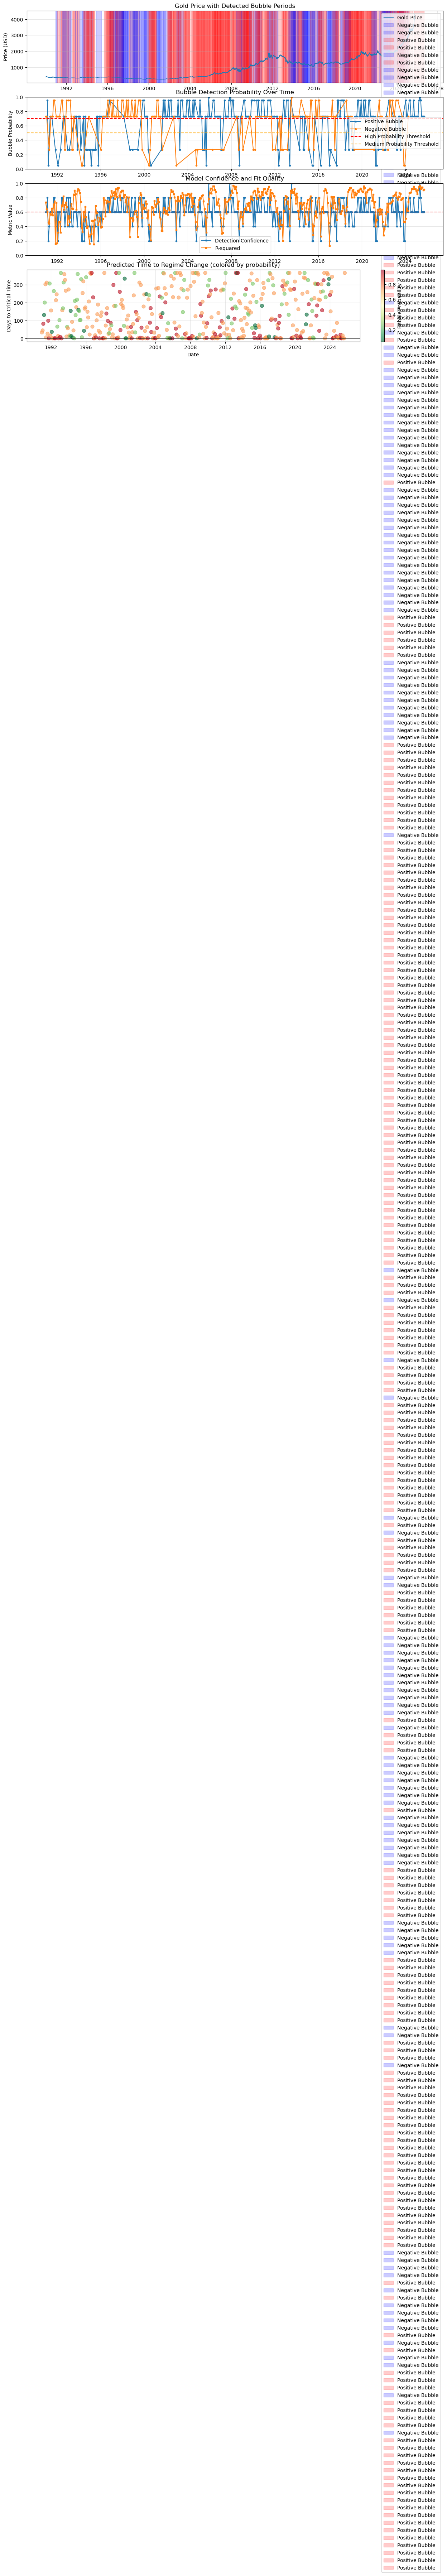

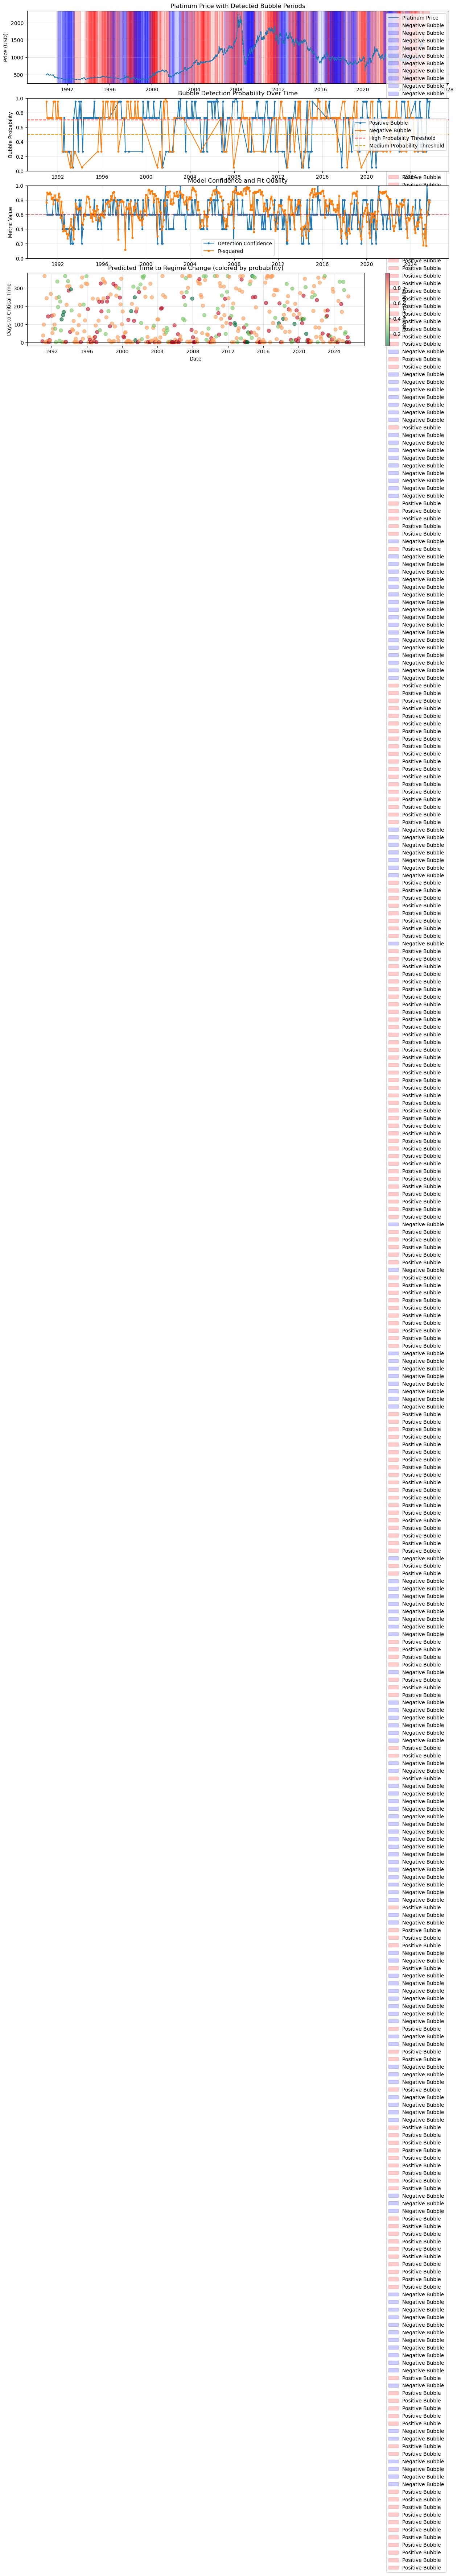

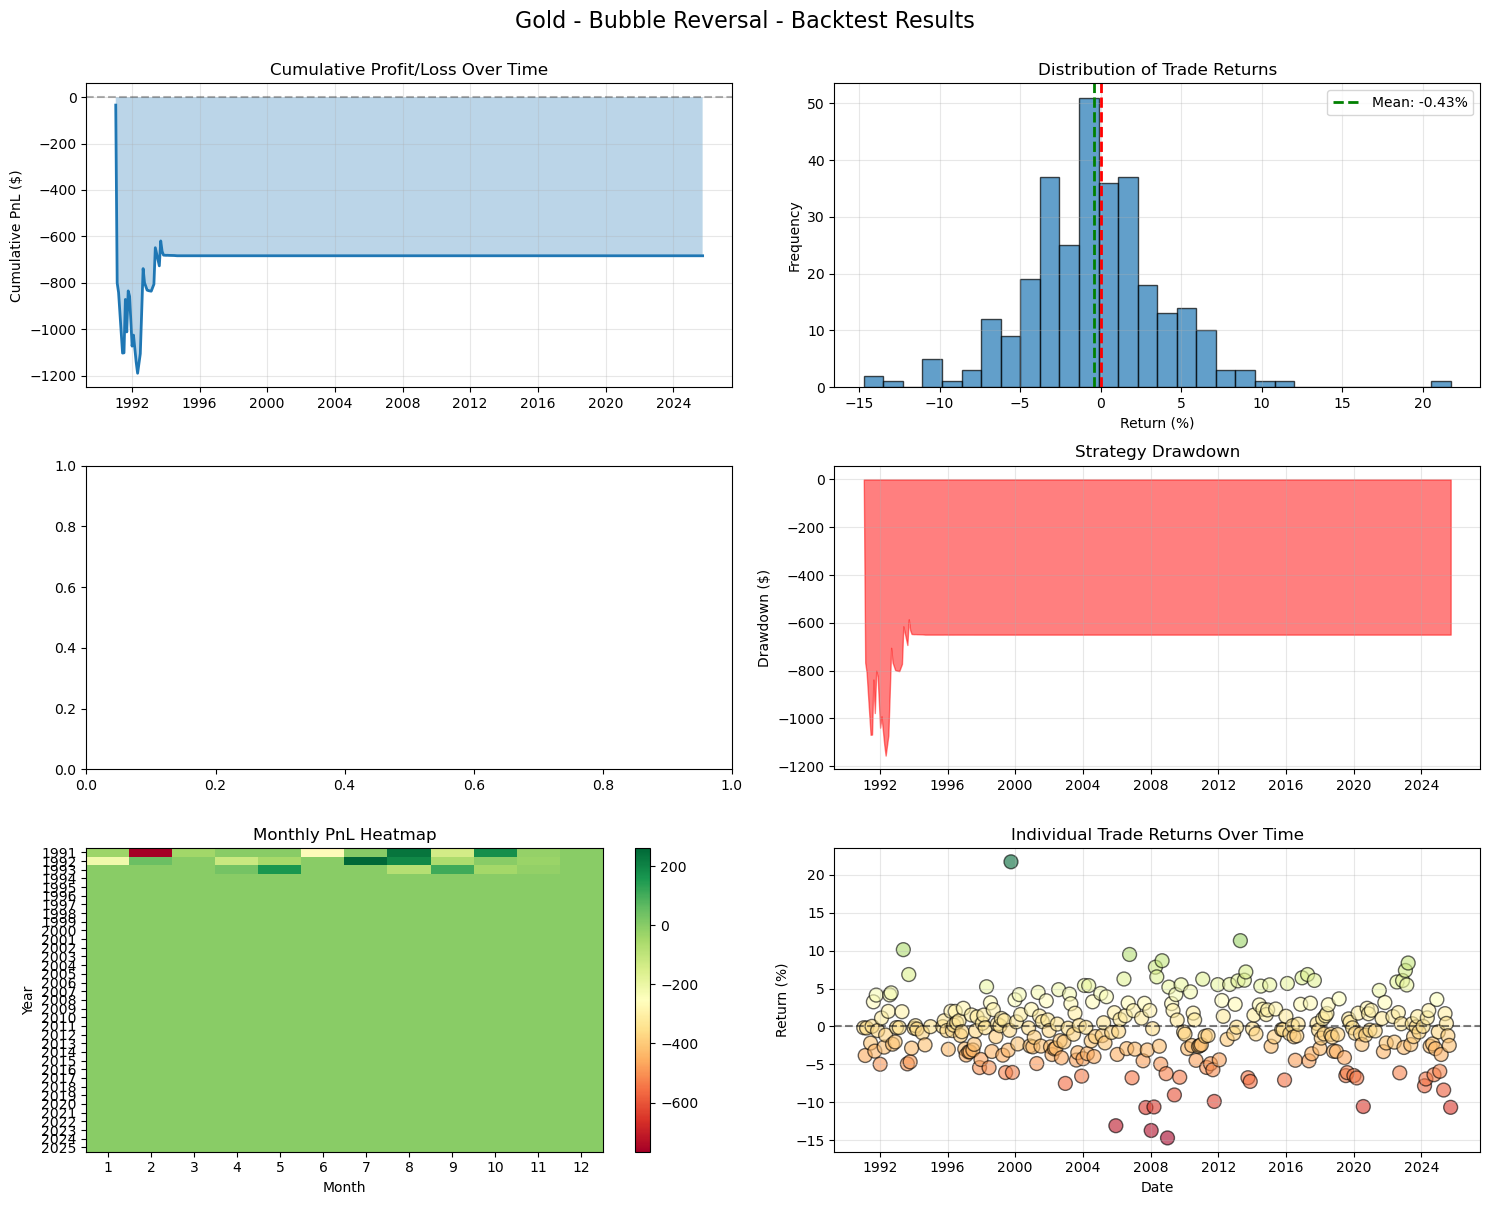

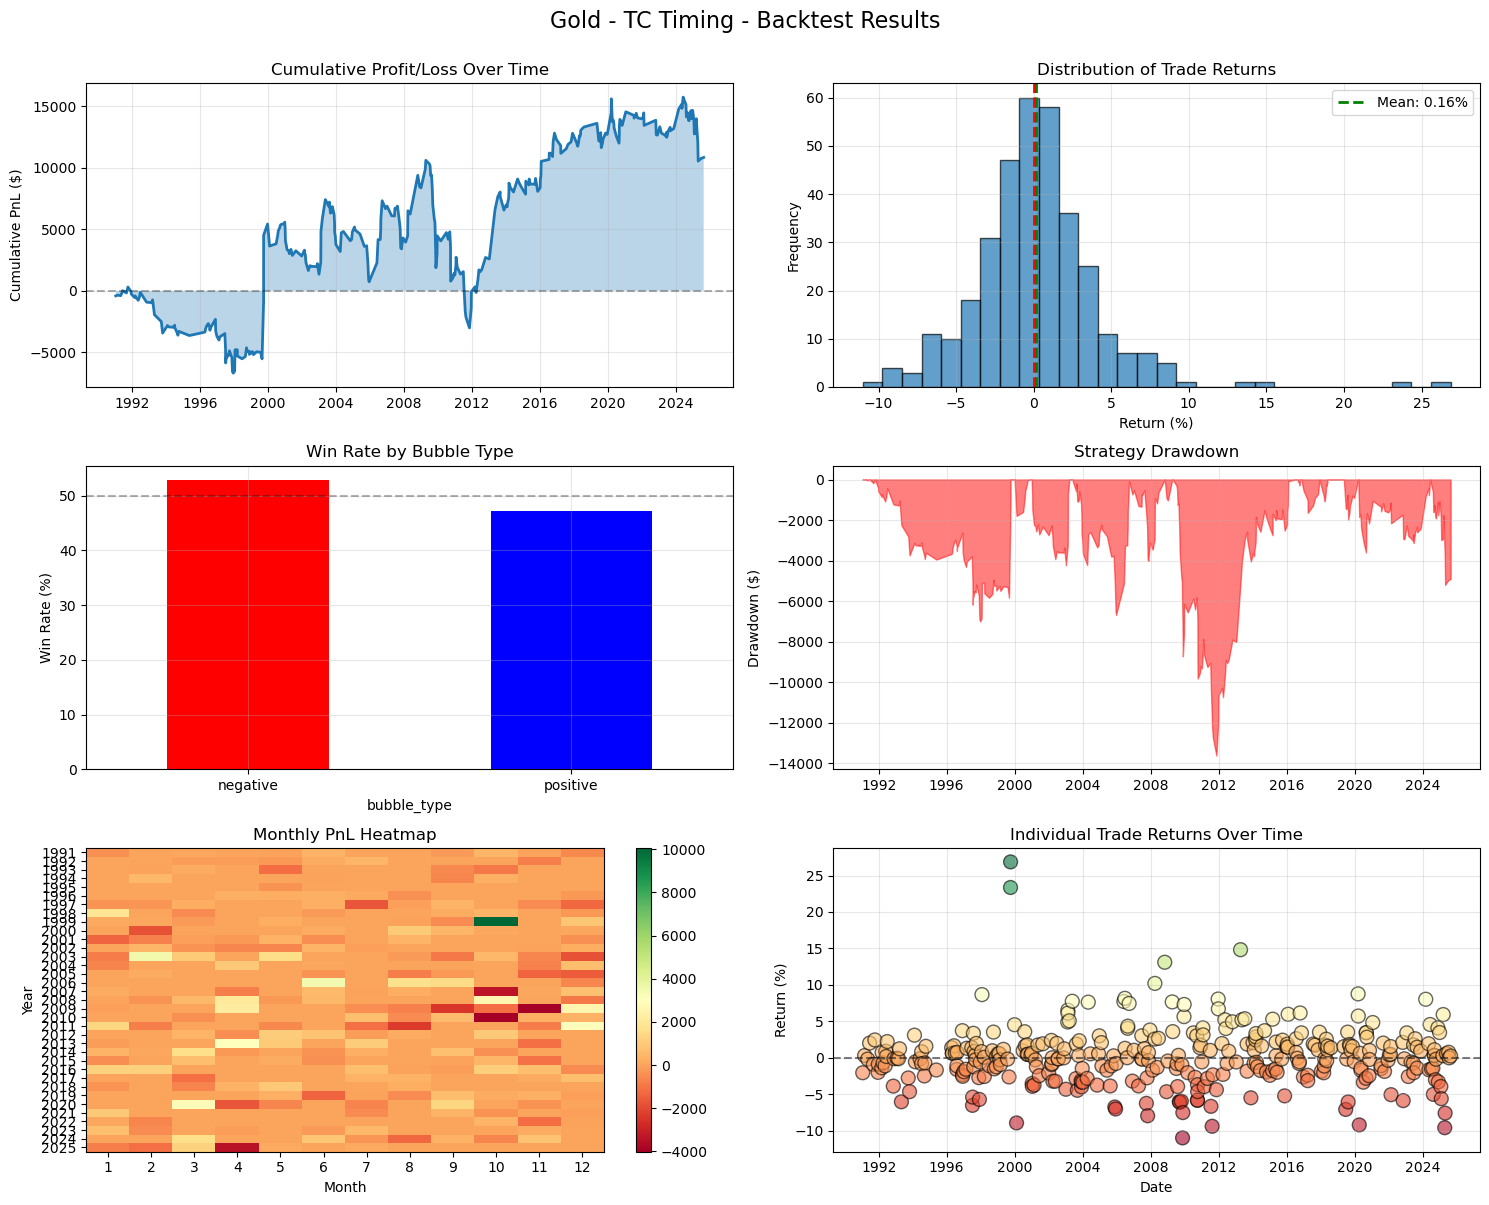

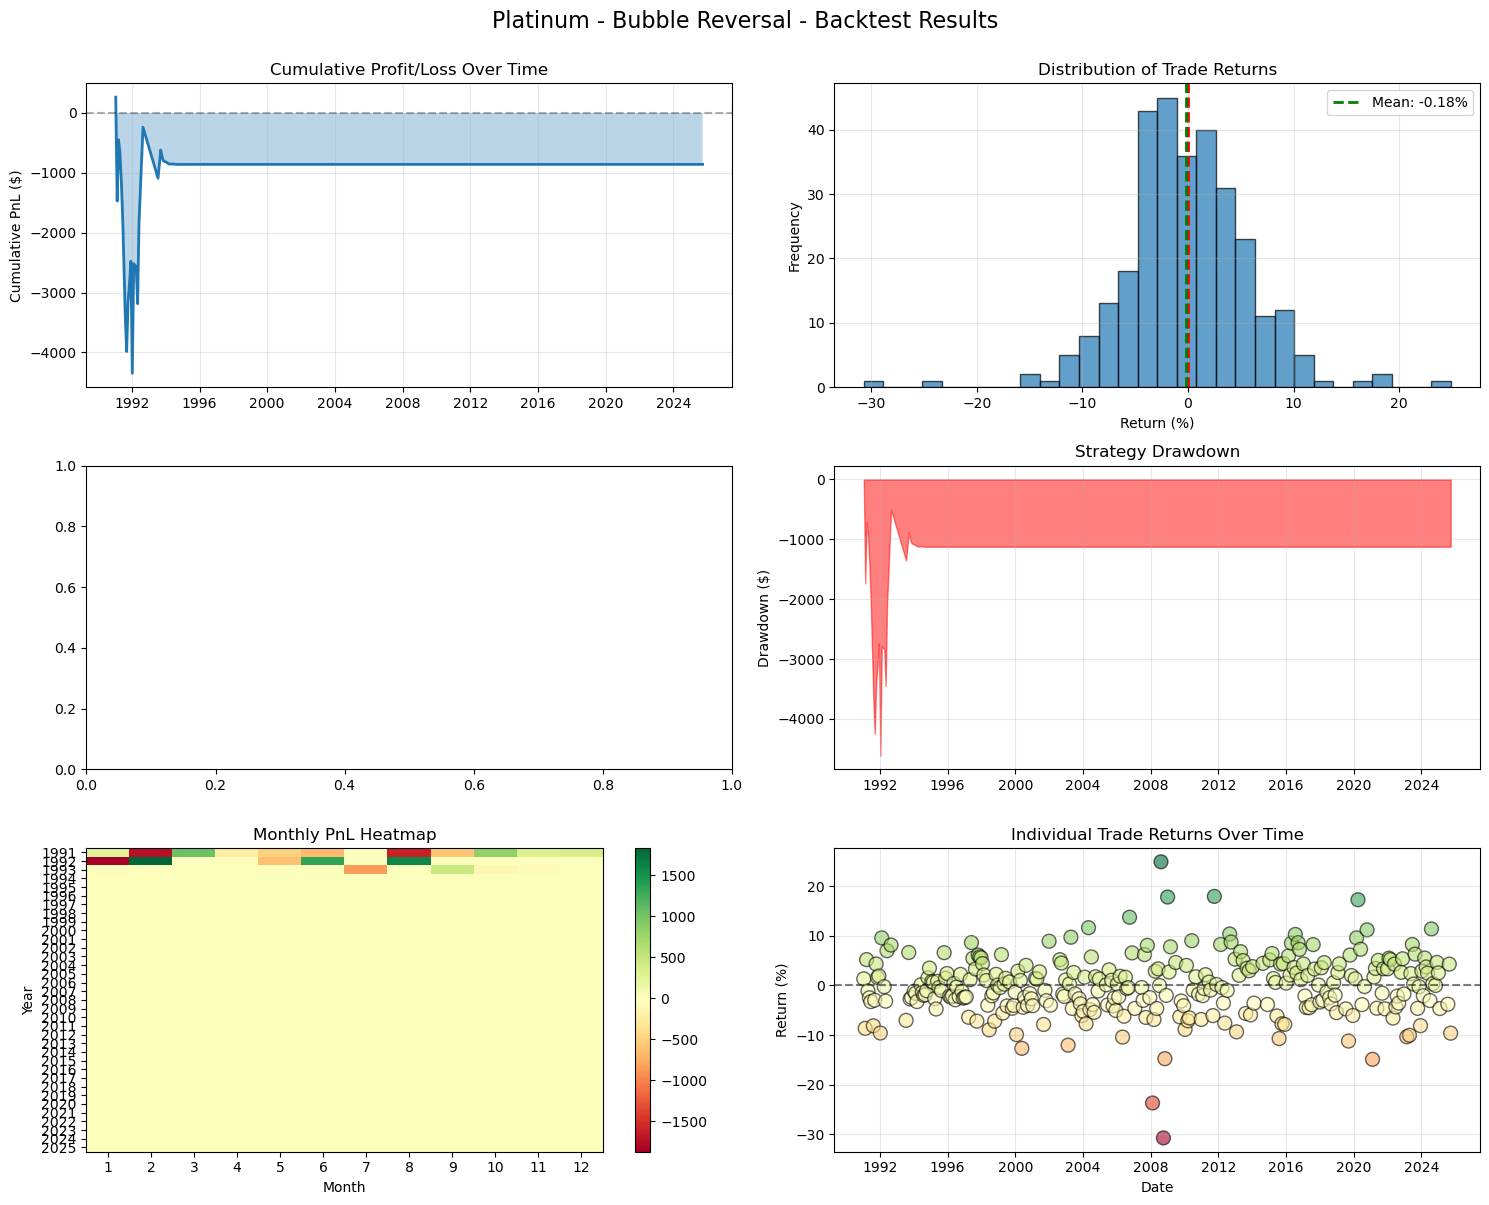

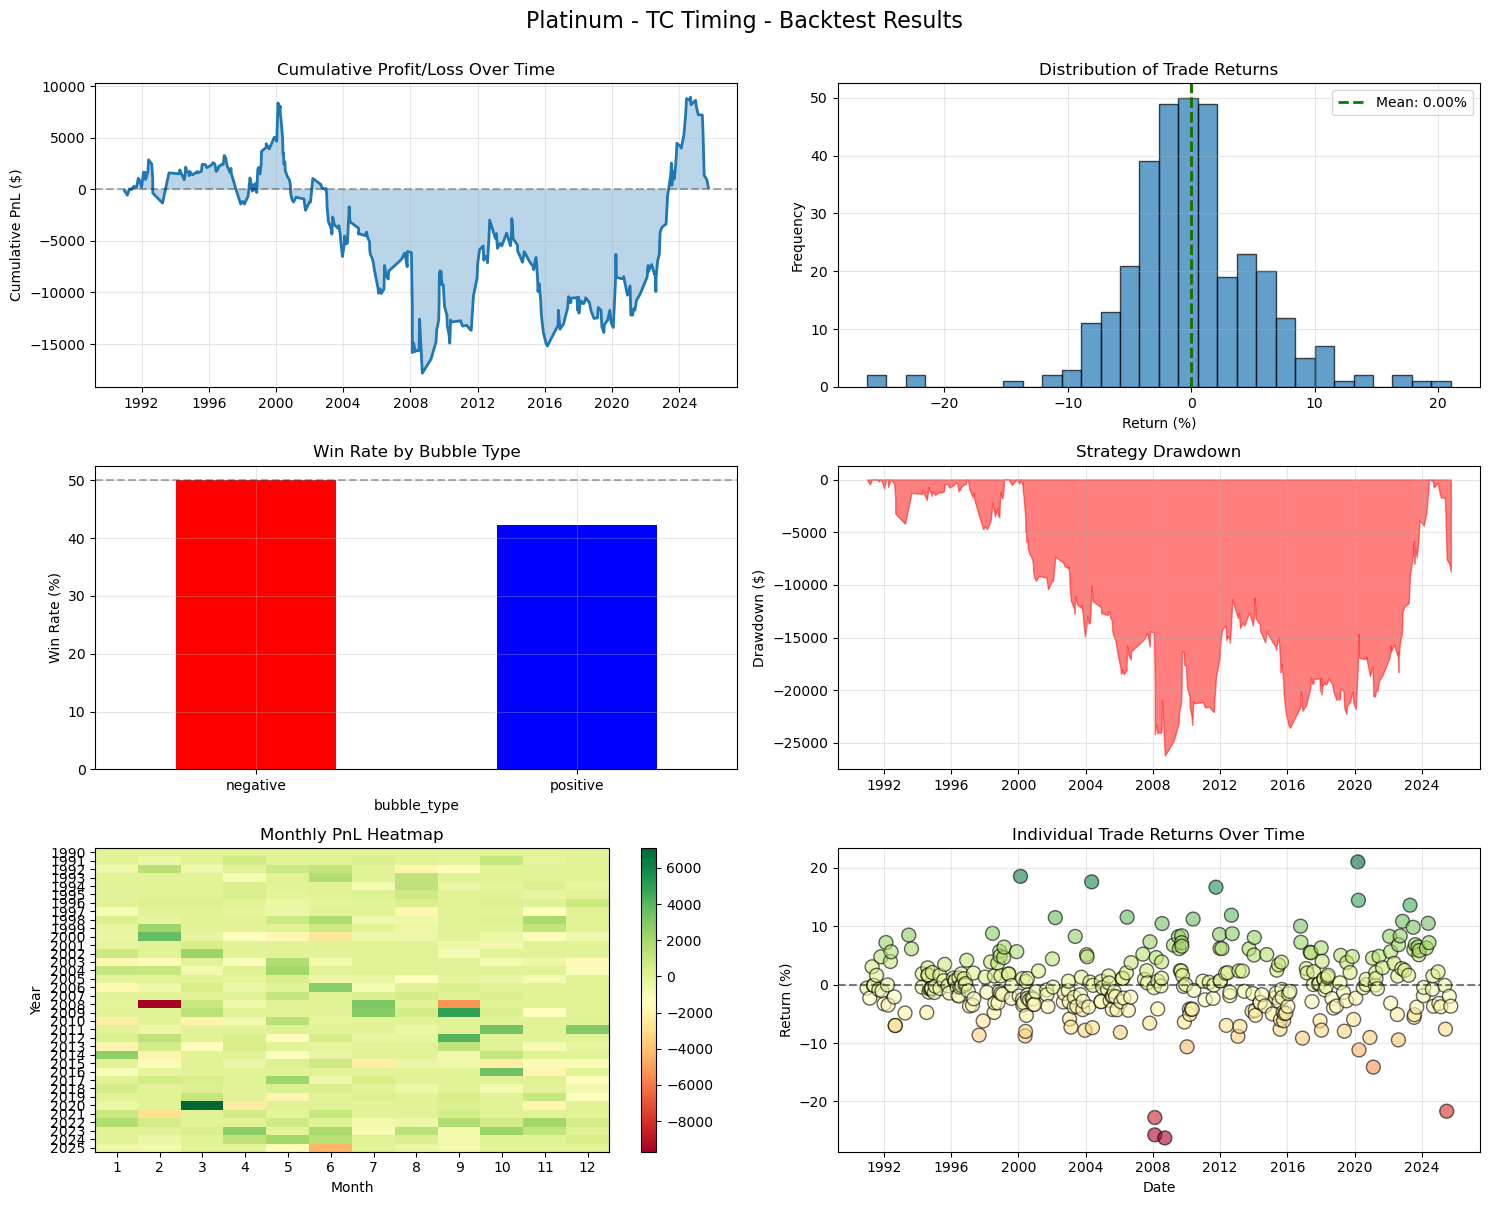

In [2]:
def main():
    """
    Main execution function for LPPLS bubble detection and backtesting
    """
    
    print("="*80)
    print("LPPLS BUBBLE DETECTION SYSTEM")
    print("Gold and Platinum Markets Analysis")
    print("="*80)
    print("\nBased on Financial Crisis Observatory Methodology")
    print("References:")
    print("  - Pham Huu (2019): Back-testing FCO Output")
    print("  - Mamageishvili (2019): Back-testing FCO Output")
    print("  - Sornette et al.: LPPLS Model Development")
    print("="*80)
    
    # Configuration
    # UPDATE THIS PATH TO YOUR CSV FILE LOCATION
    data_path = r"C:\Users\B420615\OneDrive - Standard Bank\GoldPlatData.csv"
    
    if not data_path:
        # Try to find CSV file in uploads directory
        possible_paths = [
            '/mnt/user-data/uploads/gold_platinum_data.csv',
            '/mnt/user-data/uploads/data.csv',
            '/home/claude/gold_platinum_data.csv'
        ]
        
        data_path = None
        for path in possible_paths:
            if os.path.exists(path):
                data_path = path
                print(f"Found data file: {data_path}")
                break
        
        if data_path is None:
            print("\nError: Could not find data file!")
            print("Please ensure your CSV file is uploaded and provide the path.")
            print("\nExpected format:")
            print("  Dates,Gold,Platinum")
            print("  1/2/1990,399,504")
            print("  1/3/1990,395,504")
            print("  ...")
            return
    
    # Check if file exists
    if not os.path.exists(data_path):
        print(f"\nError: File not found: {data_path}")
        return
    
    # Analysis parameters
    print("\n" + "="*80)
    print("ANALYSIS PARAMETERS")
    print("="*80)
    
    window_size = 252  # 1 year of trading days
    step_size = 21     # 1 month of trading days
    
    print(f"Window Size: {window_size} days (~1 year)")
    print(f"Step Size: {step_size} days (~1 month)")
    print(f"Confidence Threshold: 0.6")
    print(f"Probability Threshold: 0.7")
    
    # Create output directory if it doesn't exist
    os.makedirs('/mnt/user-data/outputs', exist_ok=True)
    
    # Initialize system
    print("\n" + "="*80)
    print("STEP 1: INITIALIZING SYSTEM")
    print("="*80)
    
    try:
        system = BubbleDetectionSystem(data_path)
        system.load_data()
    except Exception as e:
        print(f"\nError loading data: {str(e)}")
        print("\nPlease check that your CSV file has the correct format:")
        print("  - Column names: Dates, Gold, Platinum")
        print("  - Date format: M/D/YYYY")
        print("  - No missing values")
        return
    
    # Run LPPLS analysis
    print("\n" + "="*80)
    print("STEP 2: RUNNING LPPLS BUBBLE DETECTION")
    print("="*80)
    print("\nThis may take several minutes depending on data size...")
    print("Progress will be shown for each window analyzed.\n")
    
    try:
        results = system.run_analysis(window_size=window_size, step_size=step_size)
        
        # Save complete results
        results.to_csv('/mnt/user-data/outputs/lppls_results.csv', index=False)
        print(f"\n✓ Complete results saved: lppls_results.csv")
        
        # Get high-confidence signals
        signals = system.get_bubble_signals(
            confidence_threshold=0.6,
            probability_threshold=0.7
        )
        
        signals.to_csv('/mnt/user-data/outputs/bubble_signals.csv', index=False)
        print(f"✓ High-confidence signals saved: bubble_signals.csv")
        print(f"  Total significant bubbles detected: {len(signals)}")
        
    except Exception as e:
        print(f"\nError during analysis: {str(e)}")
        import traceback
        traceback.print_exc()
        return
    
    # Generate visualizations
    print("\n" + "="*80)
    print("STEP 3: GENERATING VISUALIZATIONS")
    print("="*80)
    
    try:
        print("\nCreating Gold market analysis...")
        system.plot_results('Gold', save_path='/mnt/user-data/outputs/gold_bubble_analysis.png')
        print("✓ Gold analysis complete: gold_bubble_analysis.png")
        
        print("\nCreating Platinum market analysis...")
        system.plot_results('Platinum', save_path='/mnt/user-data/outputs/platinum_bubble_analysis.png')
        print("✓ Platinum analysis complete: platinum_bubble_analysis.png")
        
    except Exception as e:
        print(f"\nError generating visualizations: {str(e)}")
    
    # Generate detailed report
    print("\n" + "="*80)
    print("STEP 4: GENERATING DETAILED REPORT")
    print("="*80)
    
    try:
        system.generate_report()
        print("✓ Detailed report generated: bubble_detection_report.txt")
    except Exception as e:
        print(f"\nError generating report: {str(e)}")
    
    # Run backtests
    print("\n" + "="*80)
    print("STEP 5: BACKTESTING TRADING STRATEGIES")
    print("="*80)
    
    try:
        # Prepare data for backtesting
        print("\nBacktesting Gold strategies...")
        gold_data = pd.DataFrame({
            'Date': system.data['Dates'],
            'Price': system.data['Gold']
        })
        
        gold_backtest = run_comprehensive_backtest(
            gold_data, 
            system.gold_results, 
            asset_name='Gold'
        )
        
        print("\nBacktesting Platinum strategies...")
        platinum_data = pd.DataFrame({
            'Date': system.data['Dates'],
            'Price': system.data['Platinum']
        })
        
        platinum_backtest = run_comprehensive_backtest(
            platinum_data, 
            system.platinum_results, 
            asset_name='Platinum'
        )
        
        print("\n✓ Backtesting complete!")
        
    except Exception as e:
        print(f"\nError during backtesting: {str(e)}")
        import traceback
        traceback.print_exc()
    
    # Summary
    print("\n" + "="*80)
    print("ANALYSIS COMPLETE!")
    print("="*80)
    
    print("\n📊 Summary Statistics:")
    print(f"  Data Period: {system.data['Dates'].min().strftime('%Y-%m-%d')} to {system.data['Dates'].max().strftime('%Y-%m-%d')}")
    print(f"  Total Observations: {len(system.data):,}")
    print(f"  Windows Analyzed: {len(results):,}")
    print(f"  High-Confidence Bubbles: {len(signals)}")
    
    if len(signals) > 0:
        print(f"\n  Gold Bubbles: {len(signals[signals['asset']=='Gold'])}")
        print(f"  Platinum Bubbles: {len(signals[signals['asset']=='Platinum'])}")
        
        print(f"\n  Positive Bubbles: {len(signals[signals['bubble_type']=='positive'])}")
        print(f"  Negative Bubbles: {len(signals[signals['bubble_type']=='negative'])}")
    
    print("\n📁 Output Files Location: /mnt/user-data/outputs/")
    print("\nGenerated files:")
    print("  1. lppls_results.csv - Complete analysis results")
    print("  2. bubble_signals.csv - High-confidence bubble signals")
    print("  3. gold_bubble_analysis.png - Gold visualization")
    print("  4. platinum_bubble_analysis.png - Platinum visualization")
    print("  5. bubble_detection_report.txt - Detailed report")
    print("  6. gold_strategy1_backtest.png - Gold reversal strategy")
    print("  7. gold_strategy2_backtest.png - Gold TC timing strategy")
    print("  8. platinum_strategy1_backtest.png - Platinum reversal strategy")
    print("  9. platinum_strategy2_backtest.png - Platinum TC timing strategy")
    print(" 10. Strategy reports (various .txt files)")
    
    print("\n" + "="*80)
    print("For detailed methodology, see README.md")
    print("For academic references, see the referenced papers:")
    print("  - Pham Huu (2019)")
    print("  - Mamageishvili (2019)")
    print("="*80)


if __name__ == "__main__":
    main()